<a href="https://colab.research.google.com/github/sanket2122/Store-/blob/main/Europe_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datatime

**Loading** **Dataset**

In [2]:
customers=pd.read_csv('/content/customers.csv')
order_idems=pd.read_csv('/content/order_items.csv')
order_payments=pd.read_csv('/content/order_payments.csv')


In [3]:
order_reviews=pd.read_csv('/content/order_reviews.csv')


In [4]:
order=pd.read_csv('/content/orders.csv')
products=pd.read_csv('/content/products.csv')
product_category_name=pd.read_csv('/content/product_category_name.csv')
sellers=pd.read_csv('/content/sellers.csv')

In [5]:
Buyer_count=customers['customer_id'].count()
print(Buyer_count)

34626


In [6]:
product_count=product_category_name['product_category_name'].count()
print(product_count)

71


In [7]:
#merging oreders and customers data
ordercust=pd.merge(order,customers,on='customer_id')
ordercust.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO
1,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00,f2a85dec752b8517b5e58a06ff3cd937,20780.0,rio de janeiro,RJ
2,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18 00:00:00,e97109680b052ee858d93a539597bba7,35400.0,ouro preto,MG
3,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21 00:00:00,04cf8185c71090d28baa4407b2e6d600,5271.0,sao paulo,SP
4,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04 00:00:00,ccafc1c3f270410521c3c6f3b249870f,74820.0,goiania,GO


In [8]:
ordercust=ordercust.drop(labels=['order_status','order_approved_at','customer_unique_id','order_estimated_delivery_date','order_delivered_carrier_date','order_delivered_customer_date','customer_zip_code_prefix','customer_city','customer_state'],axis=1)
ordercust.head()

,order_id,customer_id,order_purchase_timestamp
0,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49
1,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,2017-05-16 19:41:10
2,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,2018-06-07 10:06:19
3,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,2018-03-01 14:14:28
4,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,2018-06-07 19:03:12


In [9]:
ordercust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4144 entries, 0 to 4143
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  4144 non-null   object
 1   customer_id               4144 non-null   object
 2   order_purchase_timestamp  4144 non-null   object
dtypes: object(3)
memory usage: 129.5+ KB


In [10]:
ordercust.isnull().sum()

order_id                    0
customer_id                 0
order_purchase_timestamp    0
dtype: int64

In [11]:
#merging order item with order payment
itempay=pd.merge(order_idems,order_payments,on="order_id")

In [12]:
itempay.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909,1.0,credit_card,6.0,597.61
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231,1.0,credit_card,10.0,498.80
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627,1.0,credit_card,4.0,59.29
3,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,5/23/2017 3:55,50.370,16.497,1.0,boleto,2.0,79.56
4,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,12/14/2017 12:10,45.770,15.405,1.0,credit_card,2.0,73.03


In [13]:
itempay.groupby('payment_type').count().order_id

payment_type
boleto          2606
credit_card    10069
debit_card       194
voucher          731
Name: order_id, dtype: int64

In [14]:
itempay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              13600 non-null  object 
 1   order_item_id         13600 non-null  int64  
 2   product_id            13600 non-null  object 
 3   seller_id             13600 non-null  object 
 4   shipping_limit_date   13600 non-null  object 
 5   price                 13600 non-null  float64
 6   freight_value         13600 non-null  float64
 7   payment_sequential    13600 non-null  float64
 8   payment_type          13600 non-null  object 
 9   payment_installments  13600 non-null  float64
 10  payment_value         13600 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 1.2+ MB


In [15]:
itempay=itempay.drop(labels=['payment_sequential','payment_installments'],axis=1)
itempay.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value
0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,551.770,25.909,credit_card,597.61
1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,457.700,23.231,credit_card,498.80
2,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,29.877,16.627,credit_card,59.29
3,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,5/23/2017 3:55,50.370,16.497,boleto,79.56
4,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,12/14/2017 12:10,45.770,15.405,credit_card,73.03


In [16]:
itempay.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
payment_type           0
payment_value          0
dtype: int64

In [17]:
itempay=itempay.dropna(axis=0)

In [18]:
itempay.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
payment_type           0
payment_value          0
dtype: int64

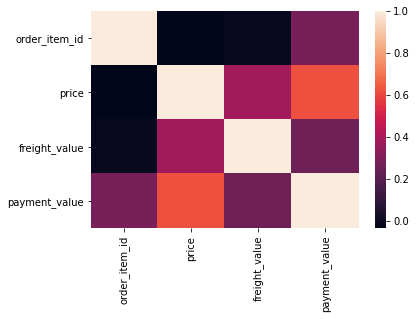

In [19]:
sns.heatmap(itempay.corr())

In [20]:
#merging product name with products
prod=pd.merge(product_category_name,products,on='product_category_name')

In [21]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_category_name          32328 non-null  object 
 1   product_category_name_english  32328 non-null  object 
 2   product_id                     32328 non-null  object 
 3   product_name_lenght            32328 non-null  float64
 4   product_description_lenght     32328 non-null  float64
 5   product_photos_qty             32328 non-null  float64
 6   product_weight_g               32327 non-null  float64
 7   product_length_cm              32327 non-null  float64
 8   product_height_cm              32327 non-null  float64
 9   product_width_cm               32327 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.7+ MB


In [22]:
prod=prod.drop(labels=['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm'],axis=1)
prod.head()

,product_category_name_english,product_id
0,health_beauty,e3e020af31d4d89d2602272b315c3f6e
1,health_beauty,c5d8079278e912d7e3b6beb48ecb56e8
2,health_beauty,36555a2f528d7b2a255c504191445d39
3,health_beauty,e586ebb6022265ae1eea38f46ffe3ead
4,health_beauty,75b4372e69a42f8ae1d908c076f547b2


In [23]:
prod.isnull().sum()

product_category_name_english    0
product_id                       0
dtype: int64

In [24]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name_english  32328 non-null  object
 1   product_id                     32328 non-null  object
dtypes: object(2)
memory usage: 757.7+ KB


In [25]:
#now merging all datasets
data=pd.merge(prod,itempay,on='product_id')

In [26]:
data.head()

,product_category_name_english,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value
0,health_beauty,adf591c625cb265c12bc6749d3a2f757,00c4f17dcb94448f27a2cbaa83f10a4b,1,a420f60ff1aa9acc80d0e42959f2b313,6/12/2018 20:31,73.60,9.607,credit_card,90.60
1,health_beauty,aba0932cedf32b2a7b6b832f11769613,0c53c83ddb6fc0f6d915cda471c0aee5,1,a416b6a846a11724393025641d4edd5e,9/5/2017 20:10,724.50,25.298,credit_card,769.26
2,health_beauty,bc4a074ab7a7ff14e98fa64671a79dc0,123eb6c42fb774382bf82e6a332af592,1,4e17c65a516f69d023a2ae78b84f28d6,3/15/2018 16:08,54.97,17.381,credit_card,85.72
3,health_beauty,2efbce46d36d9af306d4300db163b276,03e5d6a8dd520898f86f8429ccd07c21,1,b494891378bd8f4560abe576c52deacd,8/2/2018 11:45,275.77,20.722,voucher,107.64
4,health_beauty,7e437c1d65a7baab7e7ca6c9f4e98b84,1ba9bc470dd2df7a0951759dd7b88b8b,1,b56906f7fd1696e043f1bcce164c487b,7/25/2017 15:05,149.50,42.770,credit_card,225.17


In [27]:
df=pd.merge(data,ordercust,on='order_id')

In [28]:
df.head()

,product_category_name_english,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,customer_id,order_purchase_timestamp
0,health_beauty,64eb8b21706b8e2c733ba16bf02a1537,14f38e83e237f237348b97dd9f228d40,1,2c3d56f92f360fb89d849b84e8f50eae,2/6/2018 13:32,93.150,17.004,credit_card,123.23,5f8529d3f9d41718127f8ed44d471c6e,2018-01-31 09:49:33
1,health_beauty,c93558f621dc5b9277a19f009b83aaaf,158263d44a3e5ae322126338c7776dea,1,3fe7120d6257285ac6a3ce7cb071ccec,1/11/2018 9:48,229.977,16.679,credit_card,259.49,182dc723d820aae1a351f75ab1f53451,2018-01-05 09:35:30
2,health_beauty,154e7e31ebfa092203795c972e5804a6,20be6d24b0a84a4e329e5973d524f20f,1,cc419e0650a3c5ba77189a1882b7556a,8/10/2017 23:50,45.977,44.395,credit_card,249.04,eb7276a4ee7dd4449adcde6da478121a,2017-08-01 23:35:06
3,health_beauty,154e7e31ebfa092203795c972e5804a6,20be6d24b0a84a4e329e5973d524f20f,2,cc419e0650a3c5ba77189a1882b7556a,8/10/2017 23:50,45.977,44.395,credit_card,249.04,eb7276a4ee7dd4449adcde6da478121a,2017-08-01 23:35:06
4,health_beauty,154e7e31ebfa092203795c972e5804a6,26262a08c620d910b93d309db0e16725,1,cc419e0650a3c5ba77189a1882b7556a,12/22/2017 14:56,55.177,10.114,credit_card,73.07,2aa3c45e42925370972f456902aa66bd,2017-12-13 14:40:11


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 0 to 573
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_category_name_english  574 non-null    object 
 1   product_id                     574 non-null    object 
 2   order_id                       574 non-null    object 
 3   order_item_id                  574 non-null    int64  
 4   seller_id                      574 non-null    object 
 5   shipping_limit_date            574 non-null    object 
 6   price                          574 non-null    float64
 7   freight_value                  574 non-null    float64
 8   payment_type                   574 non-null    object 
 9   payment_value                  574 non-null    float64
 10  customer_id                    574 non-null    object 
 11  order_purchase_timestamp       574 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 5

In [30]:
df.isnull().sum()

product_category_name_english    0
product_id                       0
order_id                         0
order_item_id                    0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_type                     0
payment_value                    0
customer_id                      0
order_purchase_timestamp         0
dtype: int64

In [31]:
df_max=df.groupby('product_category_name_english').count()

In [32]:
df_max.sort_values(by='product_id').product_id

product_category_name_english
agro_industry_and_commerce                  1
furniture_bedroom                           1
fashion_underwear_beach                     1
fashio_female_clothing                      1
furniture_mattress_and_upholstery           1
industry_commerce_and_business              1
kitchen_dining_laundry_garden_furniture     1
furniture_living_room                       1
art                                         1
luggage_accessories                         2
home_construction                           2
market_place                                2
costruction_tools_tools                     2
drinks                                      2
home_appliances_2                           2
fixed_telephony                             2
computers                                   2
home_confort                                2
books_general_interest                      3
musical_instruments                         4
small_appliances                            4
food

In [33]:
df_counting=df.groupby(['product_category_name_english','product_id']).count().order_id
df_counting.sort_values(axis=0)

product_category_name_english  product_id                      
agro_industry_and_commerce     f3c179e260e0eeffbe02340259404cb1     1
housewares                     99e28f7c171b6945dc991d1178ffedfe     1
                               783dae38feb9e3a364e24e25168cfa8a     1
                               750dcfda0a9788bba89c94bb82a322db     1
                               727017cd91a0361b8ae4cfcff15e9682     1
                                                                   ..
telephony                      d34c07a2d817ac73f4caf8c574215fed     5
bed_bath_table                 926a505f318353d8634f3c5102756352     5
computers_accessories          71cedfb0fc49b02e2cb77b7ae1fff332     6
housewares                     d02e5b014cc50a42a3ede0b3dc1fc63e     6
electronics                    bdc3291ab242ec1effc8eb0987850268    10
Name: order_id, Length: 458, dtype: int64

**For the Promotional purpose we should promote agro/houseware products as they are very less selling items**

In [34]:
df.head()

,product_category_name_english,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,customer_id,order_purchase_timestamp
0,health_beauty,64eb8b21706b8e2c733ba16bf02a1537,14f38e83e237f237348b97dd9f228d40,1,2c3d56f92f360fb89d849b84e8f50eae,2/6/2018 13:32,93.150,17.004,credit_card,123.23,5f8529d3f9d41718127f8ed44d471c6e,2018-01-31 09:49:33
1,health_beauty,c93558f621dc5b9277a19f009b83aaaf,158263d44a3e5ae322126338c7776dea,1,3fe7120d6257285ac6a3ce7cb071ccec,1/11/2018 9:48,229.977,16.679,credit_card,259.49,182dc723d820aae1a351f75ab1f53451,2018-01-05 09:35:30
2,health_beauty,154e7e31ebfa092203795c972e5804a6,20be6d24b0a84a4e329e5973d524f20f,1,cc419e0650a3c5ba77189a1882b7556a,8/10/2017 23:50,45.977,44.395,credit_card,249.04,eb7276a4ee7dd4449adcde6da478121a,2017-08-01 23:35:06
3,health_beauty,154e7e31ebfa092203795c972e5804a6,20be6d24b0a84a4e329e5973d524f20f,2,cc419e0650a3c5ba77189a1882b7556a,8/10/2017 23:50,45.977,44.395,credit_card,249.04,eb7276a4ee7dd4449adcde6da478121a,2017-08-01 23:35:06
4,health_beauty,154e7e31ebfa092203795c972e5804a6,26262a08c620d910b93d309db0e16725,1,cc419e0650a3c5ba77189a1882b7556a,12/22/2017 14:56,55.177,10.114,credit_card,73.07,2aa3c45e42925370972f456902aa66bd,2017-12-13 14:40:11


In [36]:
df.groupby('shipping_limit_date').sum().price

shipping_limit_date
1/1/2018 22:30      603.750
1/10/2018 19:46     131.077
1/11/2018 9:48      229.977
1/12/2018 19:08     204.700
1/16/2017 23:42     867.100
                     ...   
9/4/2017 9:25       894.700
9/5/2017 20:30      105.777
9/5/2017 5:32       264.960
9/8/2017 15:45     1034.770
9/8/2017 15:55      206.770
Name: price, Length: 467, dtype: float64

In [38]:
df['year'] = pd.DatetimeIndex(df['shipping_limit_date']).year
df.head()

,product_category_name_english,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,customer_id,order_purchase_timestamp,year
0,health_beauty,64eb8b21706b8e2c733ba16bf02a1537,14f38e83e237f237348b97dd9f228d40,1,2c3d56f92f360fb89d849b84e8f50eae,2/6/2018 13:32,93.150,17.004,credit_card,123.23,5f8529d3f9d41718127f8ed44d471c6e,2018-01-31 09:49:33,2018
1,health_beauty,c93558f621dc5b9277a19f009b83aaaf,158263d44a3e5ae322126338c7776dea,1,3fe7120d6257285ac6a3ce7cb071ccec,1/11/2018 9:48,229.977,16.679,credit_card,259.49,182dc723d820aae1a351f75ab1f53451,2018-01-05 09:35:30,2018
2,health_beauty,154e7e31ebfa092203795c972e5804a6,20be6d24b0a84a4e329e5973d524f20f,1,cc419e0650a3c5ba77189a1882b7556a,8/10/2017 23:50,45.977,44.395,credit_card,249.04,eb7276a4ee7dd4449adcde6da478121a,2017-08-01 23:35:06,2017
3,health_beauty,154e7e31ebfa092203795c972e5804a6,20be6d24b0a84a4e329e5973d524f20f,2,cc419e0650a3c5ba77189a1882b7556a,8/10/2017 23:50,45.977,44.395,credit_card,249.04,eb7276a4ee7dd4449adcde6da478121a,2017-08-01 23:35:06,2017
4,health_beauty,154e7e31ebfa092203795c972e5804a6,26262a08c620d910b93d309db0e16725,1,cc419e0650a3c5ba77189a1882b7556a,12/22/2017 14:56,55.177,10.114,credit_card,73.07,2aa3c45e42925370972f456902aa66bd,2017-12-13 14:40:11,2017


In [40]:
df.groupby('year').sum()

,order_item_id,price,freight_value,payment_value
year,,,,
2016,3,321.724,42.588,397.07
2017,293,65329.844,6081.049,87152.90
2018,394,95954.459,8154.627,142058.53


**As the company started in 2016 it has very less no of customers and so from the next year as the company have gift items too its sell goes high year by year**

In [42]:
daf=pd.merge(df,order_reviews,on='order_id')
daf.head()

,product_category_name_english,product_id,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,payment_type,payment_value,customer_id,order_purchase_timestamp,year,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,health_beauty,154e7e31ebfa092203795c972e5804a6,26262a08c620d910b93d309db0e16725,1,cc419e0650a3c5ba77189a1882b7556a,12/22/2017 14:56,55.177,10.114,credit_card,73.07,2aa3c45e42925370972f456902aa66bd,2017-12-13 14:40:11,2017,40bb722a8b4a84fae3d5d45dfe0fa631,5.0,NaN,NaN,2017-12-16 00:00:00,2017-12-18 11:23:11
1,health_beauty,f23c48d81cd6a0c87f5c3b14aac68371,008fab5602c441d51f30b1464f5d4643,1,ebd2d60905fb58271facef5596b620d3,2/26/2017 10:37,114.977,20.228,credit_card,150.77,337e39b83fac394e62eb7876f45ee981,2017-02-22 10:37:41,2017,7bbf48933446bc2b6603e1c6fc539ebf,5.0,NaN,NaN,2017-03-04 00:00:00,2017-03-06 00:23:32
2,health_beauty,6cd1945e89970ad5992f82541a227c36,2cdefa55b6451e99ea05e363761f87fa,1,e9779976487b77c6d4ac45f75ec7afe9,2/21/2018 10:30,275.770,22.464,credit_card,315.51,01f9be48b48de8870e94f9744bd6ed7b,2018-02-15 11:07:38,2018,6187b1a479806db45b41e0d009cada02,5.0,NaN,"Produto chegou antes do prazo, veio uma coquet...",2018-03-08 00:00:00,2018-04-25 10:03:05
3,health_beauty,eaa5e4f6335cbfad1703327e407e4eca,07946e40cd8c6b2ab27f0fe14f21f7dd,1,ad420dd0c4f92f8af951ac24b86d0cf5,6/27/2018 20:31,368.000,29.965,credit_card,421.02,72b154a83078118969daf89bbe7fe225,2018-06-22 19:57:24,2018,eddec0ed3e9e5b773e5bfd338da93d07,4.0,NaN,NaN,2018-07-03 00:00:00,2018-07-03 18:15:16
4,health_beauty,6cdd53843498f92890544667809f1595,08cef746691fa27e23fe2c32a02c0e21,1,ccc4bbb5f32a6ab2b7066a4130f114e3,3/8/2018 12:50,804.770,41.574,debit_card,878.32,b169b69e3ad77c2ea0e63ae4710b863b,2018-02-26 14:09:33,2018,0b6f0ee7ed8b73ffcd887a502c021ed5,1.0,NaN,Sempre comprei pela lannister.com e essa foi a...,2018-03-29 00:00:00,2018-03-29 10:30:51


In [57]:
daf.groupby('review_score').count().review_id

review_score
1.0    12
2.0     4
3.0     7
4.0    23
5.0    65
Name: review_id, dtype: int64

**Most of the customers are very happy with the products they buy**

In [48]:
daf.groupby(['review_score','product_category_name_english']).count().order_id

review_score  product_category_name_english  
1.0           bed_bath_table                     1
              computers_accessories              1
              cool_stuff                         1
              electronics                        1
              fashion_bags_accessories           1
              furniture_decor                    1
              health_beauty                      1
              office_furniture                   2
              sports_leisure                     1
              telephony                          2
2.0           baby                               1
              bed_bath_table                     1
              furniture_decor                    1
              sports_leisure                     1
3.0           auto                               1
              computers_accessories              2
              housewares                         1
              sports_leisure                     2
              watches_gifts         